# Итоговая работа по курсу "Python для анализа данных"

### Задание  
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:  
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты  

Требуется выполнить следующее задание:

**1. Загрузите файл HR.csv в pandas dataframe**

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\Лина\OneDrive\Рабочий стол\study\PYDP-19\final_work\HR.csv', sep = ',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)**

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [120]:
# функция describe не счиатет моду, выведем вручную для части столбцов с дискретными и категориальными переменными
# значение столбцов Work_accident, left и promotion_last_5years по сути булевы, для большинства равно 0, поэтому не выводим

In [121]:
df[['number_project', 'average_montly_hours', 'time_spend_company', 'department', 'salary']].mode().fillna('-')

,number_project,average_montly_hours,time_spend_company,department,salary
0,4,135,3,sales,low
1,-,156,-,-,-


**3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.  
Определите две самые скоррелированные и две наименее
скоррелированные переменные**

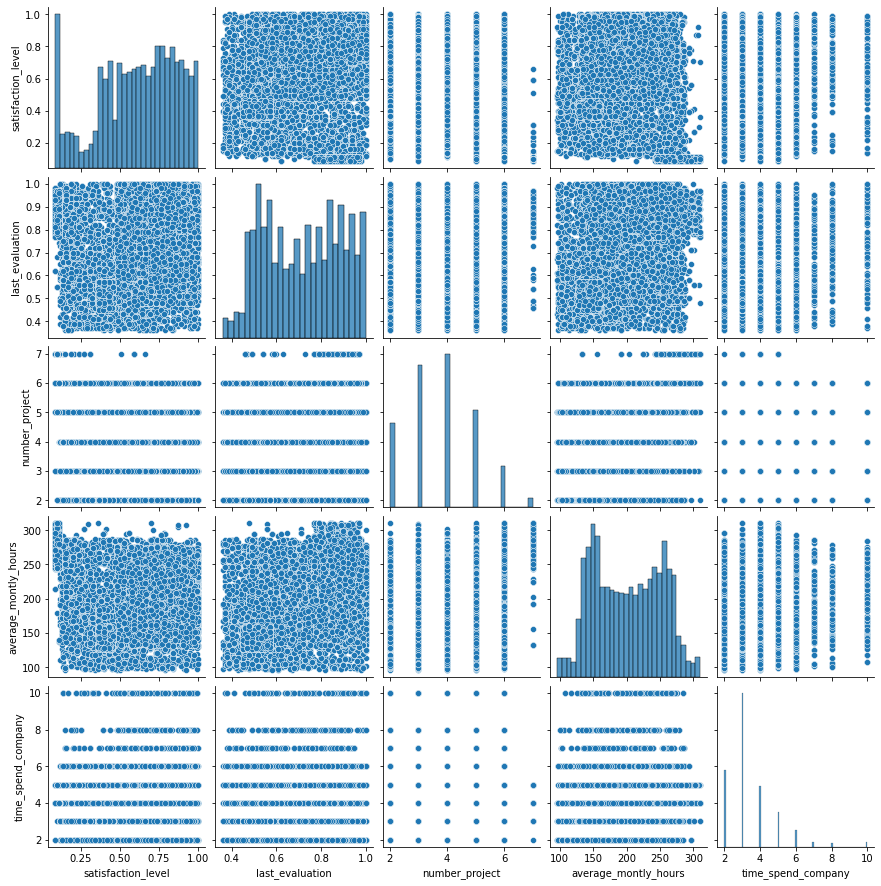

In [132]:
# построим pairplot для количественных переменных, чтобы посмотреть, как связаны между собой различные признаки
df_numeric = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']]
sns.pairplot(df_numeric)

In [ ]:
# т.к только два параметра непрерывны, на глаз сложно определить скоррелированность между собой

In [148]:
# корреляционная матрица
df_numeric.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

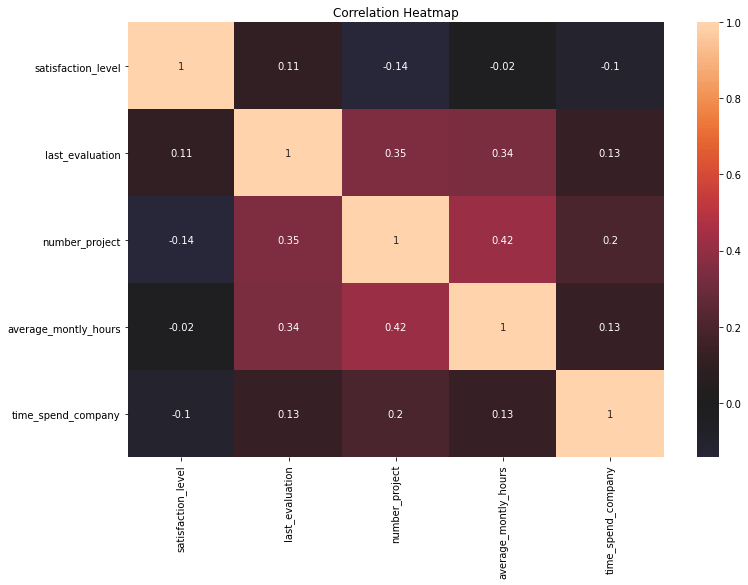

In [147]:
# визуализируем в виде тепловой карты для бОльшей наглядности результатов
sns.heatmap(df_numeric.corr(), center=0, annot=True)
plt.title('Correlation Heatmap')

In [ ]:
# наиболее скоррелировано кол-во проектов и кол-во часов на рабочем месте, что логично, но связь не сильная порядка 0,5
# наименьшая связь (т.е. коэффициент максимально близок к нулю) у уровня удовлетворенности и  и кол-во часов на рабочем месте

**4. Рассчитайте сколько сотрудников работает в каждом
департаменте**

In [14]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

**5. Показать распределение сотрудников по зарплатам**

In [32]:
salary = df.salary.value_counts()
salary

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='Уровень', ylabel='Количество сотрудников'>

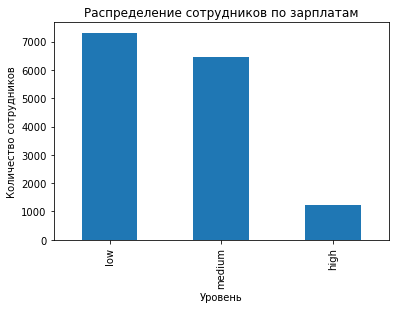

In [33]:
salary.plot(kind='bar', title='Распределение сотрудников по зарплатам',
            xlabel='Уровень',
            ylabel='Количество сотрудников')

**6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности**

In [98]:
salary_department = df[['salary', 'department']].pivot_table(
                        index='department', 
                        columns='salary',
                        aggfunc=len)

salary_department

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [99]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам в каждом департаменте'}, xlabel='Департамент', ylabel='Количество сотрудников'>

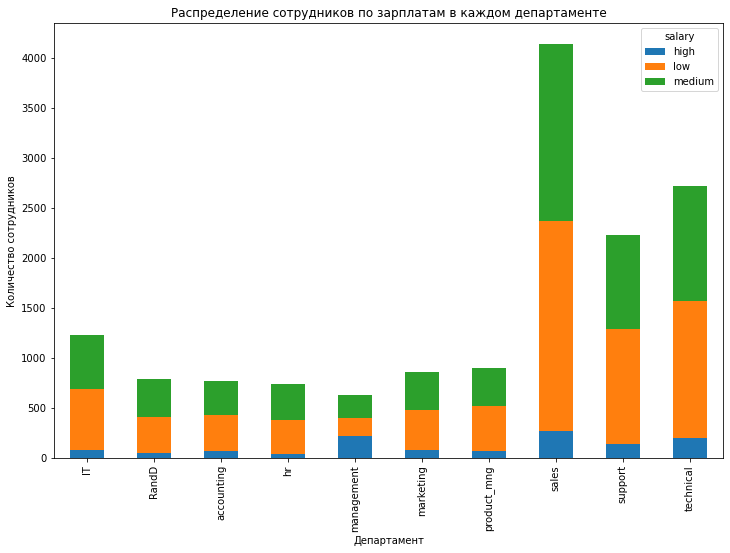

In [103]:
salary_department.plot(kind='bar',stacked=True,
                       title='Распределение сотрудников по зарплатам в каждом департаменте',
                       xlabel='Департамент',
                       ylabel='Количество сотрудников')

**7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**

In [ ]:
# в качестве нулевой гипотезы предполагаем, что среднее значения кол-ва часов,
# проведенных на работе одинаково для сотрудников с низким и с высоким окладом
# для проверки гипотезы будем использовать тест Стьюдента

In [270]:
A = df.loc[df['salary'] == 'low']['average_montly_hours']  
B = df.loc[df['salary'] == 'high']['average_montly_hours']

In [268]:
print(A.describe(), B.describe())
# видим, что средние выборок пракитически идентичны

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64 count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64
200.9965828321487 199.86742118027485


In [272]:
from scipy import stats  

np.random.seed(40)  # Закрепим seed для воспроизводимости результата.

t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

(0.7288680398062308, 0.4661023478267259)

In [ ]:
# t-test показывает небольшое различие между средними двух выборок
# получаем очень высокое значение p_value, равное 0,46, что говорит о большой схожести двух выборок и большой доле случайности полученного эффекта
# результаты не значимы на уровне 5%. это не означает, что нулевая гипотеза истинна, 
# просто недостаточно аргументов чтобы её отклонить

{'whiskers': [<matplotlib.lines.Line2D at 0x2a43d1c7f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2a43d1d7a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a43d1b82b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a43d1e5280>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a43d1f6730>],
 'means': []}

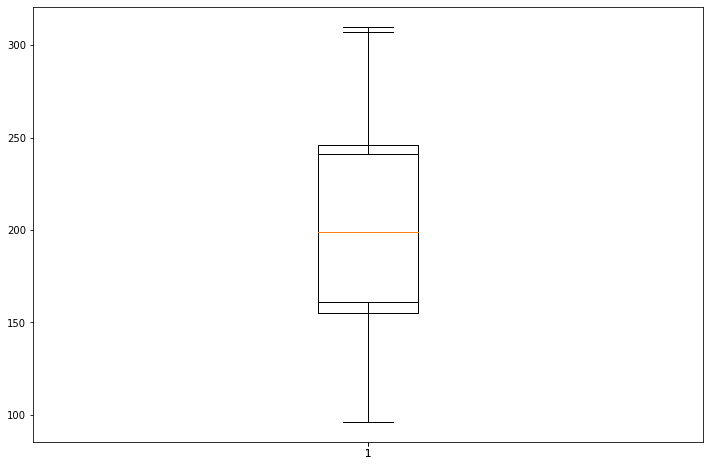

In [265]:
# построим boxplot для наглядности
plt.boxplot(A)
plt.boxplot(B) 

**8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**  

● Доля сотрудников с повышением за последние 5 лет  
● Средняя степень удовлетворенности  
● Среднее количество проектов  

In [189]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [187]:
# повысили за 5 лет всего 319 сотрудников из которых 19 уволились
df.groupby('left').sum()['promotion_last_5years']

left
0    300
1     19
Name: promotion_last_5years, dtype: int64

In [201]:
# поделим значения выше на общее количество работающих и уволившихся и выразим в процентах
print('Доля сотрудников с повышением за последние 5 лет (%)')
df_promotion = round((df.groupby('left').sum()['promotion_last_5years']/df.left.value_counts())*100,2)
df_promotion.rename(index={0:'среди работающих', 1:'среди уволившихся'})

Доля сотрудников с повышением за последние 5 лет (%)


left
среди работающих     2.63
среди уволившихся    0.53
dtype: float64

In [202]:
print('Средняя степень удовлетворенности:')
round(df.groupby('left').mean()['satisfaction_level'].rename(index={0:'среди работающих', 1:'среди уволившихся'}),2)

Средняя степень удовлетворенности:


left
среди работающих     0.67
среди уволившихся    0.44
Name: satisfaction_level, dtype: float64

In [204]:
print('Среднее количество выполненных проектов:')
round(df.groupby('left').mean()['number_project'].rename(index={0:'среди работающих', 1:'среди уволившихся'}), 1)

Среднее количество выполненных проектов:


left
среди работающих     3.8
среди уволившихся    3.9
Name: number_project, dtype: float64

**9.  Разделить данные на тестовую и обучающую выборки  
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)  
Оценить качество модели на тестовой выборки**


In [216]:
data = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']]

In [217]:
data_left = df.left

In [218]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_left, test_size=0.25)

In [219]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [220]:
lda = LinearDiscriminantAnalysis()

In [221]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [222]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [225]:
# смотрим разницу факта и прогноза
result = pd.DataFrame({'fact': y_test, 'predict': lda.predict(X_test)}).T
result

,1793,7473,11249,674,52,10003,7100,1534,1165,8756,...,3788,8742,1547,3718,11104,10376,7175,8796,13825,6585
fact,1,0,0,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
predict,0,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [226]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# НО! это не очень хорошая метрика для несбалансированных классов (уволившихся порядка 23% из выборки)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7658666666666667

In [233]:
# посчитаем preccision и recall, которые не зависят от соотношения классов
from sklearn.metrics import classification_report
report = classification_report(y_test, lda.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2857
           1       0.52      0.26      0.35       893

    accuracy                           0.77      3750
   macro avg       0.66      0.59      0.60      3750
weighted avg       0.73      0.77      0.74      3750



In [ ]:
# показатели полноты, точности и объединяющий их f-score  достаточно высок для класса неуволившихся,
# для класса уволившихся показатели гораздо ниже, точность 52%, а доля найденных объектов из всего класса составляет 26%
# общий показатель f-score построенной модели для тестовой выборки 0,6 - качество модели на среднем уровне. 

**10. Загрузить jupyter notebook с решение на github и прислать ссылку**

In [206]:
import webbrowser
webbrowser.open('https://github.com/petrovalina93/PYDP-19/tree/main/final_work')

True